In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tiktok-dataset/tiktok_dataset.csv


## TikTok Dataset Data Mining

## Step 0: Imports and Reading Data

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
pd.set_option('display.max_columns',200)

# Warnings
import warnings
warnings.filterwarnings('ignore')

## Step 1: Data Understaning

In [4]:

data = pd.read_csv('/kaggle/input/tiktok-dataset/tiktok_dataset.csv')

In [5]:
# MetaData function
# get the dataset
# run the columns and find the column
# get the unique values in each column
# Get the major contributions in each column


In [6]:
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


## Step2: Data Preparation

In [7]:
# Removing the false index
data.drop(columns=['#'],inplace=True)

In [8]:
data.shape

(19382, 11)

In [9]:
# Removing the small portions of the missing data rows
data.dropna(axis=0,inplace=True)

In [10]:
data.columns

Index(['claim_status', 'video_id', 'video_duration_sec',
       'video_transcription_text', 'verified_status', 'author_ban_status',
       'video_view_count', 'video_like_count', 'video_share_count',
       'video_download_count', 'video_comment_count'],
      dtype='object')

In [11]:
determinants = [
    # '#', 
    'claim_status', 
    'video_id', 
    'video_duration_sec',
    'video_transcription_text',
    'verified_status',
    'author_ban_status',
       #'video_view_count', 'video_like_count', 'video_share_count',
       #'video_download_count', 'video_comment_count'
]
determines = [
    # '#', 
    # 'claim_status', 
    # 'video_id', 
     'video_duration_sec',
    # 'video_transcription_text',
    # 'verified_status',
    # 'author_ban_status',
       'video_view_count', 'video_like_count', 'video_share_count',
       'video_download_count', 'video_comment_count'
]

In [12]:
data[determinants].isna().sum()
data.shape

(19084, 11)

In [13]:
data[determines]

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,59,343296.0,19425.0,241.0,1.0,0.0
1,32,140877.0,77355.0,19034.0,1161.0,684.0
2,31,902185.0,97690.0,2858.0,833.0,329.0
3,25,437506.0,239954.0,34812.0,1234.0,584.0
4,19,56167.0,34987.0,4110.0,547.0,152.0
...,...,...,...,...,...,...
19079,49,6067.0,423.0,81.0,8.0,2.0
19080,23,2973.0,820.0,70.0,3.0,0.0
19081,50,734.0,102.0,7.0,2.0,1.0
19082,8,3394.0,655.0,123.0,11.0,4.0


In [14]:
data.columns

Index(['claim_status', 'video_id', 'video_duration_sec',
       'video_transcription_text', 'verified_status', 'author_ban_status',
       'video_view_count', 'video_like_count', 'video_share_count',
       'video_download_count', 'video_comment_count'],
      dtype='object')

In [15]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
19079    False
19080    False
19081    False
19082    False
19083    False
Length: 19084, dtype: bool

## Step3: Feature Understanding

In [16]:
data['claim_status'].unique()
data.columns

Index(['claim_status', 'video_id', 'video_duration_sec',
       'video_transcription_text', 'verified_status', 'author_ban_status',
       'video_view_count', 'video_like_count', 'video_share_count',
       'video_download_count', 'video_comment_count'],
      dtype='object')

In [17]:
data['claim_status'].value_counts()

claim_status
claim      9608
opinion    9476
Name: count, dtype: int64

Text(0, 0.5, 'Count')

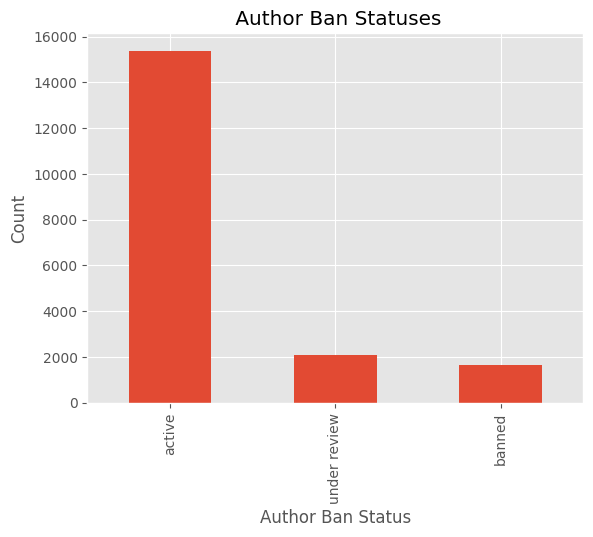

In [18]:
ax = data['author_ban_status'].value_counts()\
.head()\
.plot(kind='bar',title=' Author Ban Statuses')
ax.set_xlabel('Author Ban Status')
ax.set_ylabel('Count')

<Axes: xlabel='video_download_count'>

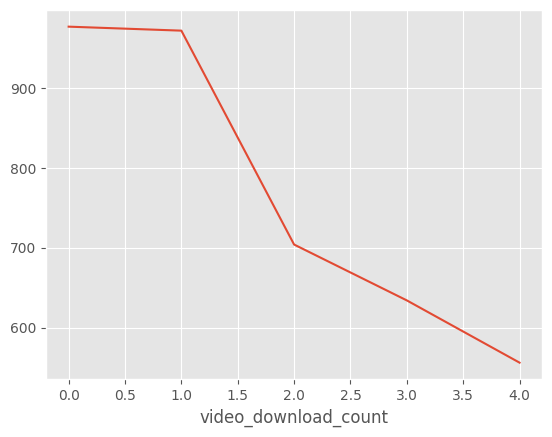

In [19]:
data['video_download_count'].value_counts().head()\
.plot()

In [20]:
data.head()

,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


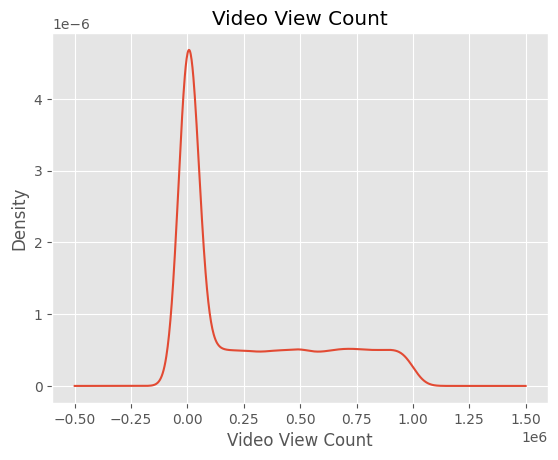

In [21]:
ax = data['video_view_count'].plot(kind='kde',title='Video View Count')
ax.set_xlabel('Video View Count')
plt.show()

## Step4: Feature Relationships

In [22]:
# Getting dummies for the author_ban_status
one_hot = pd.get_dummies(data['author_ban_status'],dtype=int)
data_auth = pd.concat([data,one_hot],axis=1)
data_auth.head()

,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,active,banned,under review
0,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,0,0,1
1,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,1,0,0
2,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,1,0,0
3,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,1,0,0
4,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,1,0,0


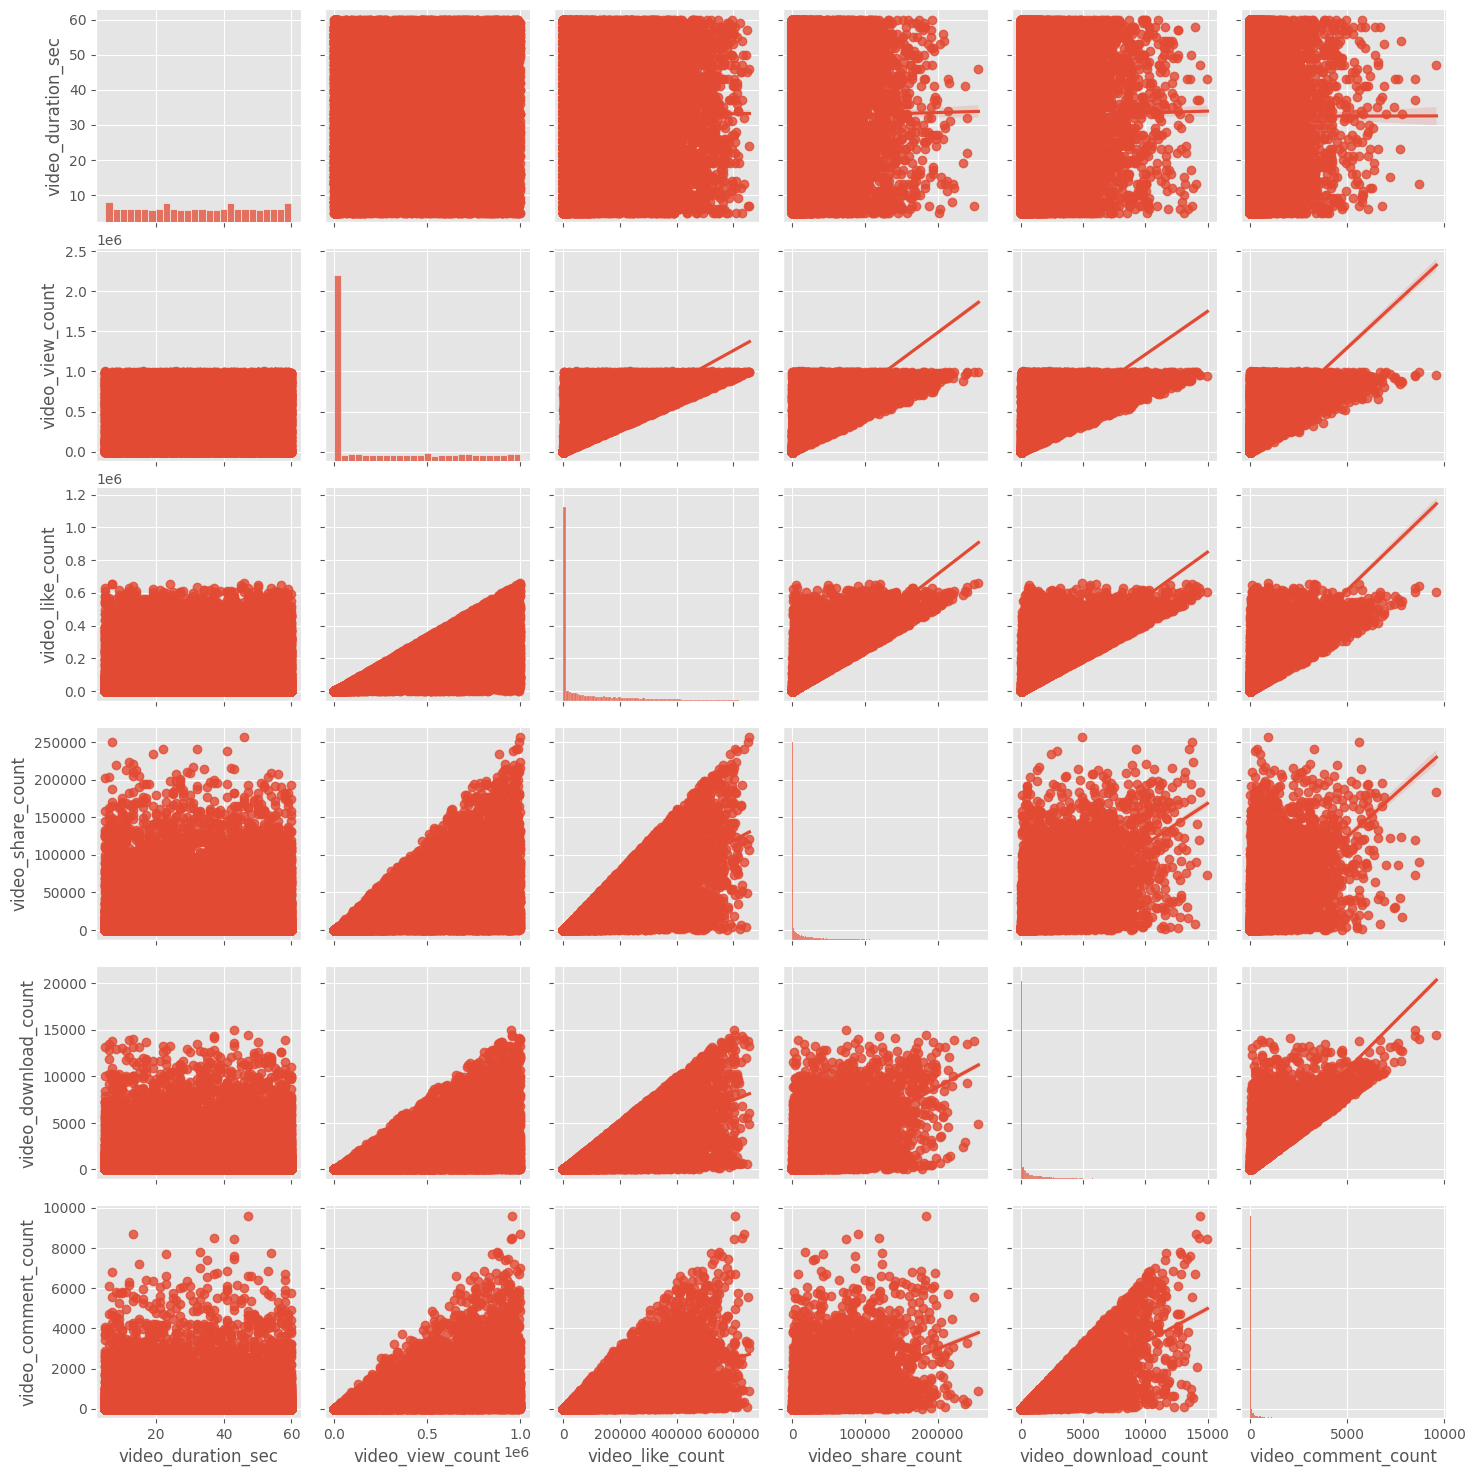

In [23]:
sns.pairplot(data[determines],kind='reg')

<Axes: xlabel='verified_status', ylabel='video_download_count'>

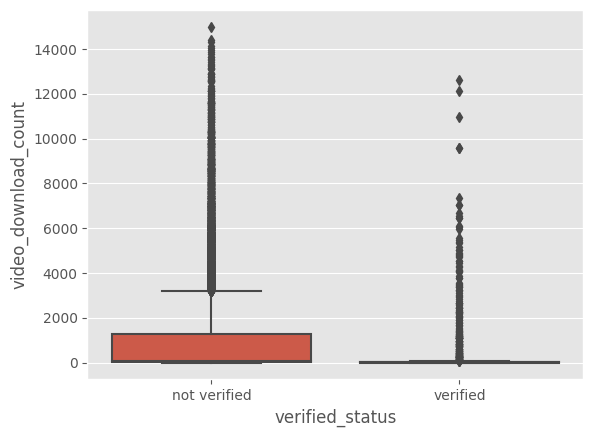

In [24]:
sns.boxplot(x='verified_status', y='video_download_count', data=data)

In [25]:
data[determines].corr()

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
video_duration_sec,1.000000,0.008481,0.011567,0.011560,0.013078,0.000615
video_view_count,0.008481,1.000000,0.804322,0.665635,0.664222,0.554172
video_like_count,0.011567,0.804322,1.000000,0.825789,0.823554,0.687185
video_share_count,0.011560,0.665635,0.825789,1.000000,0.679910,0.574632
video_download_count,0.013078,0.664222,0.823554,0.679910,1.000000,0.832464
video_comment_count,0.000615,0.554172,0.687185,0.574632,0.832464,1.000000


- Likes and shares show a strong positive correlation (r = 0.83), suggesting that popular videos tend to be shared frequently. However, video duration shows no meaningful correlation with any engagement metric, indicating that length is not a key driver of performance.

<Axes: xlabel='video_like_count', ylabel='video_share_count'>

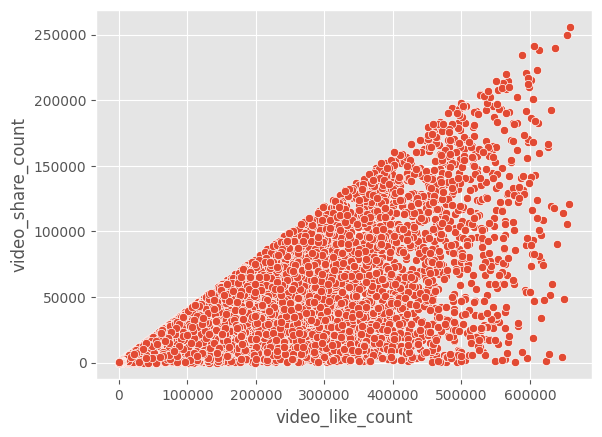

In [26]:
sns.scatterplot(x='video_like_count', y='video_share_count', data=data)

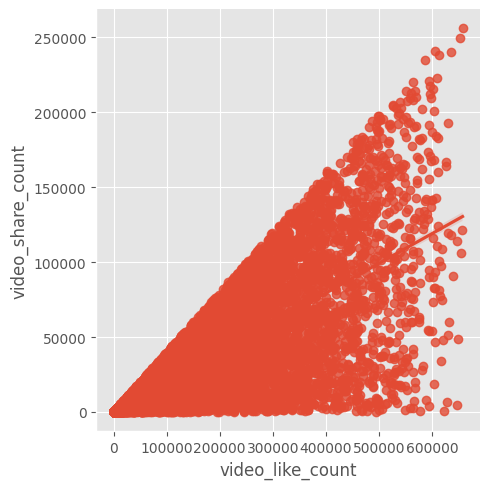

In [27]:
sns.lmplot(x='video_like_count', y='video_share_count', data=data)
plt.show()

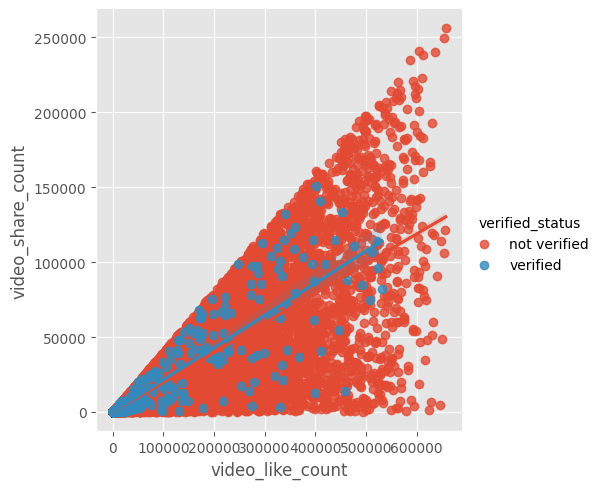

In [28]:
sns.lmplot(x='video_like_count', y='video_share_count', hue='verified_status', data=data)

In [29]:
# One hot encoding 
data = pd.get_dummies(data, drop_first=True,dtype=int)

In [30]:
data.head()

,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,claim_status_opinion,video_transcription_text_a colleague claimed the media discovered 90% of drivers admit to singing in the car,"video_transcription_text_a colleague claimed the media discovered about once a year, an asteroid the size of a car enters earth’s atmosphere",video_transcription_text_a colleague claimed the media discovered alaska is the only u.s. state whose name can be typed on a single row on the american standard keyboard,video_transcription_text_a colleague claimed the media discovered an espresso maker has been sent to space,"video_transcription_text_a colleague claimed the media discovered at birth, baby pandas are smaller than mice",video_transcription_text_a colleague claimed the media discovered australia has a bright pink lake,video_transcription_text_a colleague claimed the media discovered baby spiders are called spiderlings,video_transcription_text_a colleague claimed the media discovered baked beans are not actually baked,video_transcription_text_a colleague claimed the media discovered bananas get their curved shape by growing towards the sun,video_transcription_text_a colleague claimed the media discovered bottled water has an expiration date,video_transcription_text_a colleague claimed the media discovered buttermilk does not contain any butter,video_transcription_text_a colleague claimed the media discovered damascus is the oldest continuously inhabited city in the world,video_transcription_text_a colleague claimed the media discovered dogs can understand up to 250 hand gestures and words,video_transcription_text_a colleague claimed the media discovered dubai is an island created by humans,video_transcription_text_a colleague claimed the media discovered frigate birds can sleep while flying,video_transcription_text_a colleague claimed the media discovered gross domestic product (gdp) is the best financial indicator of a country's overall trade potential,video_transcription_text_a colleague claimed the media discovered honeybees can recognize human faces,video_transcription_text_a colleague claimed the media discovered humans are more likely to have a weird or scary dream when sleeping on their stomach,video_transcription_text_a colleague claimed the media discovered it is physically impossible for humans to keep their eyes open while sneezing,video_transcription_text_a colleague claimed the media discovered it would take less than a month to get to the moon by car at 60mph,video_transcription_text_a colleague claimed the media discovered only one-fourth of the sahara desert is sandy,video_transcription_text_a colleague claimed the media discovered over 60% of the world's population has access to the internet,video_transcription_text_a colleague claimed the media discovered people are born with only 2 natural fears: the fear of falling and the fear of loud sounds,video_transcription_text_a colleague claimed the media discovered saturn is less dense than water,video_transcription_text_a colleague claimed the media discovered sweden has the most islands of any country,video_transcription_text_a colleague claimed the media discovered the bent joint in the legs of the flamingo is its ankles,video_transcription_text_a colleague claimed the media discovered the brain is the fattiest organ in the body,video_transcription_text_a colleague claimed the media discovered the earliest playable recording of a person singing was recorded in 1860,video_transcription_text_a colleague claimed the media discovered the hottest planet in our solar system is venus.,video_transcription_text_a colleague claimed the media discovered the longest commercial flight in history took around 30 hours,video_transcription_text_a colleague claimed the media discovered the longest location name on the planet earth is 85 letters in english.,video_transcription_text_a colleague claimed the media discovered the moo

### Preprocessing 

In [31]:
from sklearn.preprocessing import StandardScaler

# Select numeric features only for clustering
numeric_cols = data.select_dtypes(include='number').columns
X = data[numeric_cols].dropna()

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


### Apply KMeans clustering

In [33]:
from sklearn.cluster import KMeans

# Choose number of clusters (start with 3 for exploration)
kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(X_scaled)


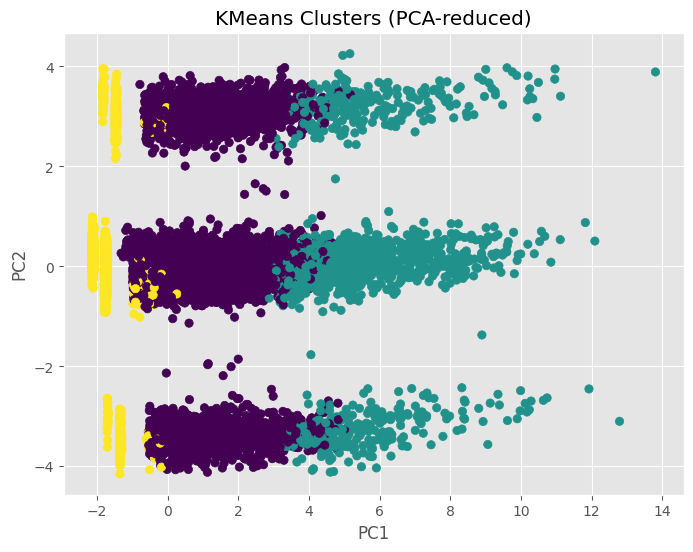

In [34]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=data['cluster'], cmap='viridis')
plt.title('KMeans Clusters (PCA-reduced)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


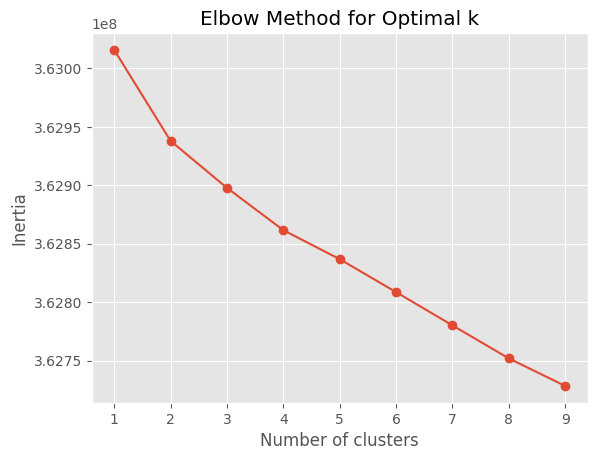

In [35]:
inertia = []
for k in range(1, 10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(range(1, 10), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()
